## Decision Tree 
Classify animals into dog and cat category based of given features 
- Plays Fetch Game
- Grumpy in nature
- Favorite food


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
from io import StringIO
dataset =StringIO('''Plays Fetch,Is grumpy,Favorite food,Species
Yes,No,Bacon,Dog
No,Yes,Dog Food,Dog
No,Yes,Cat food,Cat
No,Yes,Bacon,Cat
No,No,Cat food,Cat
No,Yes,Bacon,Cat
No,Yes,Cat Food,Cat
No,No,Dog Food,Dog
No,Yes,Cat food,Cat
Yes,No,Dog Food,Dog
Yes,No,Bacon,Dog
No,No,Cat food,Cat
Yes,Yes,Cat food,Cat
Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)
df

,Plays Fetch,Is grumpy,Favorite food,Species
0,Yes,No,Bacon,Dog
1,No,Yes,Dog Food,Dog
2,No,Yes,Cat food,Cat
3,No,Yes,Bacon,Cat
4,No,No,Cat food,Cat
5,No,Yes,Bacon,Cat
6,No,Yes,Cat Food,Cat
7,No,No,Dog Food,Dog
8,No,Yes,Cat food,Cat
9,Yes,No,Dog Food,Dog


## Filter and Arrange Data

In [15]:
df['B Plays Fetch'] = np.where(df['Plays Fetch'] == 'Yes', True, False)
df['B Is grumpy'] = np.where(df['Is grumpy'] == 'Yes', True, False)

df["B Favorite food"] = [(0 if (food == "Bacon") else 
                        1 if (food == "Dog Food") else 2 ) 
                       for food in df["Favorite food"]]
df

,Plays Fetch,Is grumpy,Favorite food,Species,B Plays Fetch,B Favorite food
0,Yes,No,Bacon,Dog,True,0
1,No,Yes,Dog Food,Dog,False,1
2,No,Yes,Cat food,Cat,False,2
3,No,Yes,Bacon,Cat,False,0
4,No,No,Cat food,Cat,False,2
5,No,Yes,Bacon,Cat,False,0
6,No,Yes,Cat Food,Cat,False,2
7,No,No,Dog Food,Dog,False,1
8,No,Yes,Cat food,Cat,False,2
9,Yes,No,Dog Food,Dog,True,1


In [5]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
obtained_tree = decisiontree.fit(df[["B Plays Fetch",
                                     "B Is grumpy",
                                     "B Favorite food"]], 
                                 df['Species'])

print("Extracted Classes ", decisiontree.classes_)  

Extracted Classes  ['Cat' 'Dog']


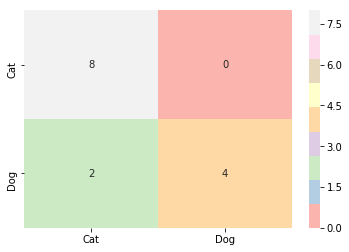

In [6]:
import seaborn
Predicted_Species = obtained_tree.predict(
    df[["B Plays Fetch","B Is grumpy","B Favorite food"]])
seaborn.heatmap(confusion_matrix(df['Species'], Predicted_Species), 
                annot=True, cmap="Pastel1", 
                xticklabels=decisiontree.classes_, yticklabels=decisiontree.classes_)

In [7]:
print(classification_report(df['Species'], Predicted_Species))

             precision    recall  f1-score   support

        Cat       0.80      1.00      0.89         8
        Dog       1.00      0.67      0.80         6

avg / total       0.89      0.86      0.85        14



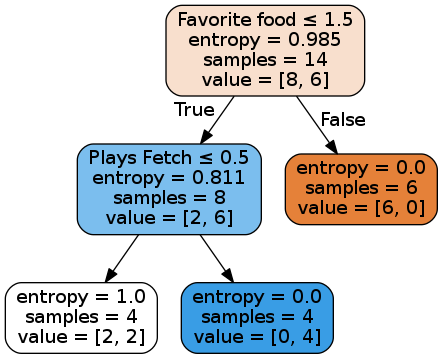

In [8]:
# Only for windows 
# import os
# os.environ["PATH"] += os.pathsep + \
#                 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

DecisionTreeImg = StringIO()

export_graphviz(obtained_tree, out_file=DecisionTreeImg,  
                filled=True, rounded=True, 
                feature_names=["Plays Fetch",
                               "Is grumpy",
                               "Favorite food"],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())  
Image(graph.create_png())